# **2017331088_Roman Raihan**

**A program to simulate the analog-digital signal using Pulse Code Modulation(PCM).**

**Pulse-code modulation (PCM)** is a method used to digitally represent sampled analog signals. A PCM encoder has three processes:


1. Sampling
2. Quantization
3. Encoding



*Importing necessary libraries*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

**The general equation of Analog signal is:**

$$ v(t)=Acos(2πft) $$

*Creating the signal with their basic properties*

Here,

A = Amplitude of the signal

f = Frequency of the signal

t = Time variable of the signal

T = Time period of the signal



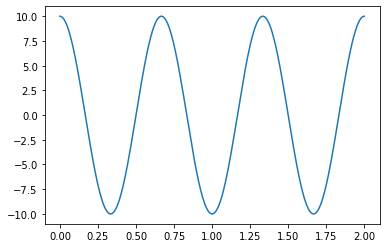

In [ ]:

A = 10                           
f = 1.5
T = 1 / f
t = np.linspace(0, 2.0, 500)
x = A * np.cos(2.0 * np.pi * f * t)
plt.plot(t, x)
plt.show()

# Sampling 
Here, 

n = number_of_sample_per_interval

fs = sampling rate

ts = sampling interval


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


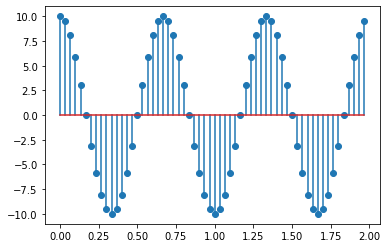

In [ ]:
n = 20
fs = n * f
ts=np.arange(0, 2, 1 / fs)
xs=A*np.cos(2*np.pi*f*ts) # xs Sampled signal 
plt.stem(ts, xs)
plt.show()

# Quantization
b_bit = b-bit quantizer, number of bits required to encode each quantization level. 

L = uniformly spaced quantization levels
partition = level are between vmin and vmax with difference of delta

codebook = decrease the partition by half of delta

xq = quantized signal

encode = assigned codec

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


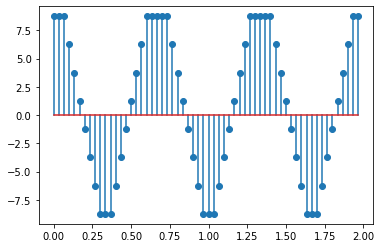

In [ ]:
b_bit = 3
L = 2 ** b_bit
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(xs)):
    # left <= xs[i] < right
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    # left <= xs[i], only for last portion
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

plt.stem(ts, xq)
plt.show()

# Encoding


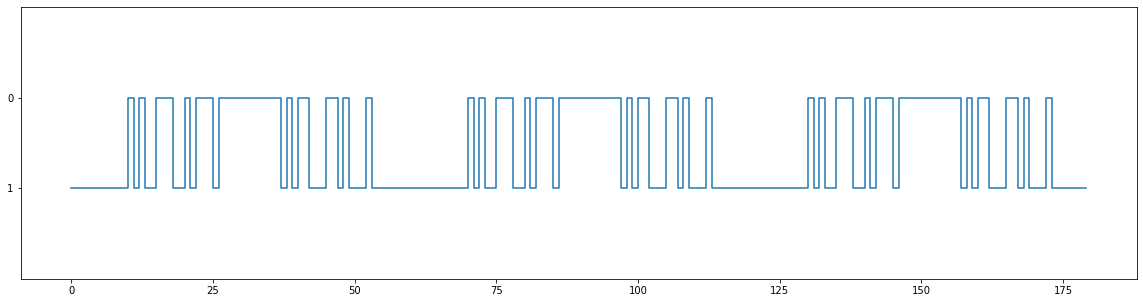

In [ ]:
def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    if(len(binary) > bit):
      return binary
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])

pos = np.arange(len(binary_codec))
plt.figure(figsize=(20, 5))
plt.ylim(-1, 2)
plt.step(pos, binary_codec)
plt.show()